Imports

In [45]:
import cv2
import numpy as np
from PIL import Image

# 1. Logo Image as Watermark

1.1 Import cover image and convert it to numpy array.

In [46]:
image = Image.open('./resources/images/input.png')
image = image.resize((500,300))

cover_image = np.array(image.convert('RGB'))
h_image, w_image, _ = cover_image.shape

1.2 Load Logo Image and convert it to numpy array.

In [47]:
logo = Image.open('./resources/images/logo.png')

logo_image = np.array(logo.convert('RGB'))
h_logo, w_logo, _ = logo_image.shape

1.3 Calculate the center of the image to place the logo watermark at. Calculate the left, right, top and bottom pixels for the logo positioned inside the cover image.

In [48]:
center_y = int(h_image / 2)
top_y = center_y - int(h_logo / 2)
bottom_y = top_y + h_logo

center_x = int(w_image / 2)
left_x = center_x - int(w_logo / 2)
right_x = left_x + w_logo

1.4 Find ROI (Region of Interest) in the cover image and add the logo to the region.

In [49]:
roi = cover_image[top_y: bottom_y, left_x: right_x]
result = cv2.addWeighted(roi, 1, logo_image, 1, 0)

cv2.line(cover_image, (0, center_y), (left_x, center_y), (0, 0, 255), 1)
cv2.line(cover_image, (right_x, center_y), (w_image, center_y), (0, 0, 255), 1)

cover_image[top_y: bottom_y, left_x: right_x] = result

1.5 Convert the cover image to RGB image object to be displayed.

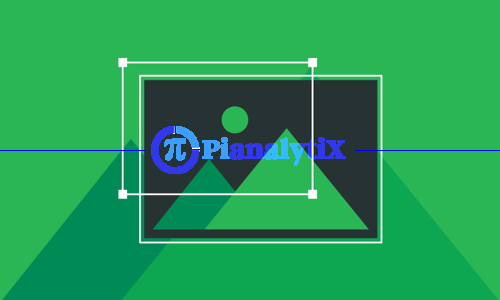

In [50]:
img = Image.fromarray(cover_image, 'RGB')
img

# 2. Text as Watermark

2.1 Import cover image and convert it to numpy array.

In [51]:
image = Image.open('./resources/images/input.png')
image = image.resize((500,300))

cover_image = np.array(image.convert('RGB'))
h_image, w_image, _ = cover_image.shape

2.2 Select Text for watermarking

In [52]:
text = "This is a sample text"

2.2 Embed the watermarking text in the lower right corner of the image.

In [53]:
cv2.putText(cover_image, text, org=(w_image - len(text)*10, h_image - 10), fontFace=cv2.FONT_HERSHEY_COMPLEX, fontScale=0.5,
            color=(0,0,255), thickness=2, lineType=cv2.LINE_4); 

2.3 Convert the cover image to RGB image object to be displayed.

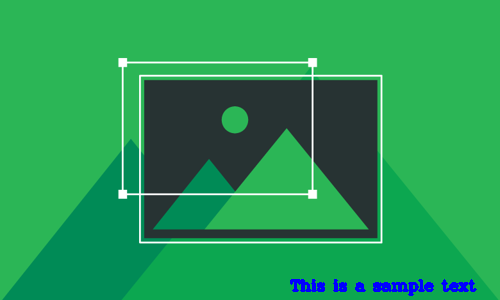

In [54]:
img = Image.fromarray(cover_image, 'RGB')
img